# Linear Regression 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def compute_cost(X, y, theta):
    '''
    compute a cost function value for a linear regression. 
    '''

    pred = np.matmul(X,theta)
    error = np.subtract(pred, y)
    sq_error = np.power(error, 2)
    mean_sq_error = np.mean(sq_error) / 2

    return mean_sq_error

def gradient_descent(X, y, theta, iteration, learning_rate):
    
    # for each iteration
    for i in range(iteration):

        # Update all thetas based on the error of the previous step.
        # When multiply matrix in numpy, please be careful with the shape of the array
        # Array shape (1,) doesn't have the same behavior as (1,1) shape.
        n = X.shape[1]
        h = np.matmul(X, theta).reshape(-1,1)
        e = np.subtract(h, y).reshape(-1,1)
        for j in range(n):
            gradient = np.mean(e * X[:,j].reshape(-1,1))
            theta[j] = theta[j] - (learning_rate * gradient)
        
        cost = compute_cost(X, y, theta)
        
        if not i % 500 or i == iteration-1:
            print(f"{gradient=}")
            print(f"Iteration : {i}, theta : {theta[0][0], theta[1][0]}, {cost=}")
    
    return theta

# Training data

In [3]:
# Read data
data = pd.read_csv('./ex1data1.txt', header=None)

# Prepare data
X, y = data.loc[:,0], data.loc[:,1]
m = len(y)
X, y = np.array(X).reshape(-1,1), np.array(y).reshape(-1,1)

# Add constant value to X
X = np.concatenate((np.ones(m).reshape(-1,1), X), axis=1)

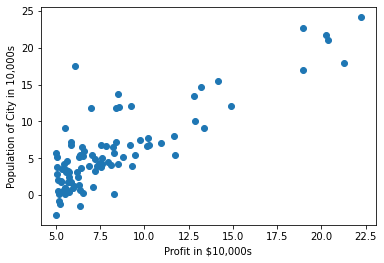

In [4]:
# Scatter plot

plt.scatter(X[:,1],y);
plt.xlabel("Profit in $10,000s");
plt.ylabel("Population of City in 10,000s");

# Compute cost function

In [5]:
# Compute cost function

cost = compute_cost(X, y, np.array([0, 0]).reshape(-1,1))
print(f"Your compute_cost function returns : {cost:.2f}")
assert round(cost,2) == 32.07

cost = compute_cost(X, y, np.array([-1, 2]).reshape(-1,1))
print(f"Your compute_cost function returns : {cost:.2f}")
assert round(cost,2) == 54.24

Your compute_cost function returns : 32.07
Your compute_cost function returns : 54.24


# Gradient descent

In [6]:
# Initialized hyper-parameter
theta = np.zeros(2).reshape(-1,1)
iteration = 1_500
alpha = 0.01

# Fitting with gradient descent
final_theta = gradient_descent(X, y, theta, iteration, learning_rate=alpha)

assert round(final_theta[0][0], 4) == -3.6303
assert round(final_theta[1][0], 4) == 1.1664

gradient=-65.32884974555671
Iteration : 0, theta : (0.05839135051546393, 0.6532884974555672), cost=6.737190464870007
gradient=-0.029208301262750497
Iteration : 500, theta : (-2.2857747062804568, 1.0312910607643297), cost=4.712956453749759
gradient=-0.011850164301397906
Iteration : 1000, theta : (-3.242581724645949, 1.1274127040711983), cost=4.515815084502823
gradient=-0.004816438376699875
Iteration : 1499, theta : (-3.6302914394043597, 1.166362350335582), cost=4.483388256587726


In [7]:
predict1 = np.matmul(np.array([1, 3.5]), final_theta)
predict2 = np.matmul(np.array([1, 7]), final_theta)
print(f"{predict1=},\n {predict2=}")

predict1=array([0.45197679]),
 predict2=array([4.53424501])


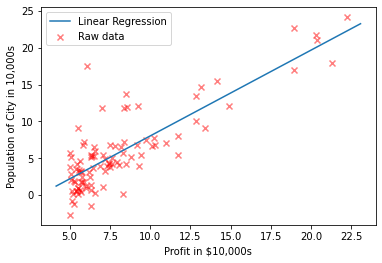

In [8]:
# Scatter plot

plt.scatter(X[:,1],y, c='red', marker='x', alpha=.5);
plt.xlabel("Profit in $10,000s");
plt.ylabel("Population of City in 10,000s");

# Add linear regression line

axes = plt.gca()
x_vals = np.array(axes.get_xlim());
y_vals = final_theta[0] + final_theta[1] * x_vals;
plt.plot(x_vals, y_vals, '-');
plt.legend(["Linear Regression", "Raw data"]);

# Visualizing J(theta)

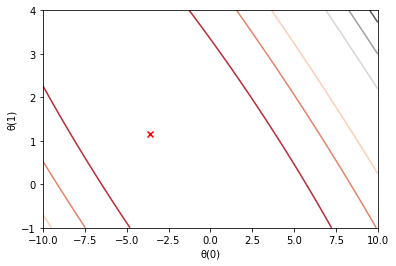

In [9]:
# Search space

theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 100);

# Prepare data for contour plot

plt_x, plt_y = np.meshgrid(theta0_vals, theta1_vals)
plt_z = j_vals = list()
for i in theta0_vals:
    for j in theta1_vals:
        j_vals.append(compute_cost(X, y, np.array([i, j]).reshape(-1,1)))
plt_z = np.array(j_vals).reshape(len(theta0_vals), len(theta1_vals))

# Contour plot

plt.contour(plt_x, plt_y, plt_z, cmap='RdGy');
plt.scatter(final_theta[0], final_theta[1], c='red', marker='x');
plt.xlabel("θ(0)");
plt.ylabel("θ(1)");

# Linear regression with multiple variables